In [1]:
from author_style.utils import *
import tensorflow

In [2]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
import unidecode
#import spacy
import numpy as np
import pandas as pd

In [3]:
clean_texts()

In [4]:
df = csv_to_dataframes(output="p")

In [5]:
df.head()

,text,author,title,book_date
0,Pendant que Nous franchissions la porte du Nor...,GUTH Paul,Si j_étais le Bon Dieu,1987
1,"« En 486 après Jésus-Christ, les troupes de Sy...",GUTH Paul,Si j_étais le Bon Dieu,1987
2,Van Eyck présenta La Vierge au chanoine Van de...,GUTH Paul,Si j_étais le Bon Dieu,1987
3,"Parce que Je suis le Tout-Puissant, ne me trai...",GUTH Paul,Si j_étais le Bon Dieu,1987
4,"Puisqu’il en est ainsi, La Fontaine aura son t...",GUTH Paul,Si j_étais le Bon Dieu,1987


In [5]:
data = df[["text","author"]]

In [6]:
data.shape

(69654, 2)

In [7]:
data["taille"] = data.text.apply(lambda x : len(x))

/var/folders/t8/clhcfp2n5sgcs4b81syf8xym0000gp/T/ipykernel_14838/92849788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["taille"] = data.text.apply(lambda x : len(x))


In [8]:
data

,text,author,taille
0,Pendant que Nous franchissions la porte du Nor...,GUTH Paul,1482
1,"« En 486 après Jésus-Christ, les troupes de Sy...",GUTH Paul,1429
2,Van Eyck présenta La Vierge au chanoine Van de...,GUTH Paul,1402
3,"Parce que Je suis le Tout-Puissant, ne me trai...",GUTH Paul,1359
4,"Puisqu’il en est ainsi, La Fontaine aura son t...",GUTH Paul,1353
...,...,...,...
69649,Reste la possibilité d’aller faire un tour dan...,ECHENOZ Jean,366
69650,Technique n° 3 : s’imposer une énumération. Se...,ECHENOZ Jean,349
69651,"Le lendemain matin, il se lève tard, traînant ...",ECHENOZ Jean,322
69652,Il part en direction de la gare maritime du Ha...,ECHENOZ Jean,193


<AxesSubplot:>

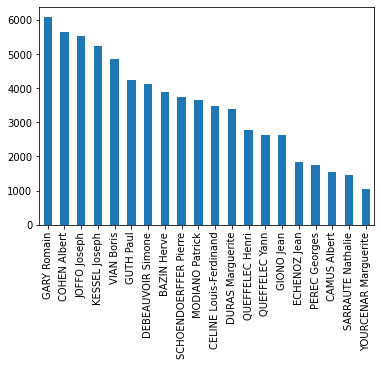

In [9]:
df.author.value_counts().plot(kind="bar")

In [10]:
df.author.value_counts()

GARY Romain               6086
COHEN Albert              5646
JOFFO Joseph              5540
KESSEL Joseph             5259
VIAN Boris                4861
GUTH Paul                 4250
DEBEAUVOIR Simone         4133
BAZIN Herve               3887
SCHOENDOERFFER Pierre     3758
MODIANO Patrick           3661
CELINE Louis-Ferdinand    3498
DURAS Marguerite          3387
QUEFFELEC Henri           2786
QUEFFELEC Yann            2636
GIONO Jean                2635
ECHENOZ Jean              1849
PEREC Georges             1739
CAMUS Albert              1545
SARRAUTE Nathalie         1450
YOURCENAR Marguerite      1048
Name: author, dtype: int64

In [11]:
min_lines = df.author.value_counts().min()
last_author = df.author.value_counts().index[-1]
author_without_last = df.author.value_counts().index[:-1].to_list()

In [12]:
author_without_last 

['GARY Romain',
 'COHEN Albert',
 'JOFFO Joseph',
 'KESSEL Joseph',
 'VIAN Boris',
 'GUTH Paul',
 'DEBEAUVOIR Simone',
 'BAZIN Herve',
 'SCHOENDOERFFER Pierre',
 'MODIANO Patrick',
 'CELINE Louis-Ferdinand',
 'DURAS Marguerite',
 'QUEFFELEC Henri',
 'QUEFFELEC Yann',
 'GIONO Jean',
 'ECHENOZ Jean',
 'PEREC Georges',
 'CAMUS Albert',
 'SARRAUTE Nathalie']

In [13]:
#Downsample majority classPython
# Separate majority and minority classes

df_minority = df[df.author==last_author]
df_minority

,text,author,title,book_date
4447,"Jeune, la mère Dida avait ressemblé aux fleurs...",YOURCENAR Marguerite,Denier-Du-Reve,1934
4448,Marcella Ardeati était née en Romagne ; à Cese...,YOURCENAR Marguerite,Denier-Du-Reve,1934
4449,"Elle s'était échappée seule, sitôt après le dî...",YOURCENAR Marguerite,Denier-Du-Reve,1934
4450,"– Tu parles de la guerre de 14, reprend le vie...",YOURCENAR Marguerite,Denier-Du-Reve,1934
4451,Le mur de la chambre magique s'écroula : des v...,YOURCENAR Marguerite,Denier-Du-Reve,1934
...,...,...,...,...
57373,"Petite âme, âme tendre et flottante, compagne ...",YOURCENAR Marguerite,Les mémoires d_Hadrien,1950
57374,Mais la révolte en Maurétanie fumait encore. J...,YOURCENAR Marguerite,Les mémoires d_Hadrien,1950
57375,Nous avons longé la Colchide. Sachant combien ...,YOURCENAR Marguerite,Les mémoires d_Hadrien,1950
57376,Mais j’avais hâte de quitter Rome. Mes prédéce...,YOURCENAR Marguerite,Les mémoires d_Hadrien,1950


In [14]:
from sklearn.utils import resample 

#df_downsampled=pd.DataFrame(columns=['text','author','title','book_date'])
df_all = []
for _ in author_without_last:
    df_majority = df[df.author==_]


    # Downsample majority class
    df_majority_downsampled = resample(df_majority, 
                                     replace=False,    # sample without replacement
                                     n_samples=min_lines,     # to match minority class
                                     random_state=123) # reproducible results
    
    df_all.append(df_majority_downsampled)

# Combine minority class with downsampled majority class
df_all.append(df_minority)
df_downsampled = pd.concat(df_all, ignore_index= True, axis=0)    

In [15]:
df_downsampled.author.value_counts()

GARY Romain               1048
COHEN Albert              1048
SARRAUTE Nathalie         1048
CAMUS Albert              1048
PEREC Georges             1048
ECHENOZ Jean              1048
GIONO Jean                1048
QUEFFELEC Yann            1048
QUEFFELEC Henri           1048
DURAS Marguerite          1048
CELINE Louis-Ferdinand    1048
MODIANO Patrick           1048
SCHOENDOERFFER Pierre     1048
BAZIN Herve               1048
DEBEAUVOIR Simone         1048
GUTH Paul                 1048
VIAN Boris                1048
KESSEL Joseph             1048
JOFFO Joseph              1048
YOURCENAR Marguerite      1048
Name: author, dtype: int64

In [16]:
X_0_preproc = df_downsampled["text"].to_numpy()
y_0_preproc = df_downsampled["author"].to_numpy()

In [18]:
import joblib

joblib.dump(X_0_preproc,"X_0_preproc.pkl")
joblib.dump(y_0_preproc,"y_0_preproc.pkl")

['y_0_preproc.pkl']